### Pytorch에서 `tensor`를 복사하는 여러 방법들

- https://stackoverflow.com/questions/55266154/pytorch-preferred-way-to-copy-a-tensor 참고

In [1]:
import torch

# 1.

x = torch.randn(2, 3)
print(x)

tensor([[ 1.0038, -0.6371,  0.4342],
        [ 0.4307, -1.2467,  0.0804]])


#### 1. new_tensor

- `new_tensor()` 는 leaf variable을 생성해줌. 만약 gradient를 흐르게 하고 싶으면 argument로 `require_grad=True` 설정하면 됨

In [2]:
y_1 = x.new_tensor(x)

/home/hwan/anaconda3/envs/torch1.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


#### 2. clone() + detach()

- computational graph에서 더이상 필요하지 않을 때, clone()을 해준 이후에 detach() 해줌

- detach()를 안해주면, cloned tensor에 gradient propagate 가 발생하면 original tensor 도 propagate 된다

In [3]:
y_2 = x.clone().detach()

#### 3. empty_like() + copy()

#### 4. torch.tensor()


In [5]:
y_3 = torch.empty_like(x).copy_(x)

y_4 = torch.tensor(x)

/home/hwan/anaconda3/envs/torch1.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Kernels ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:01

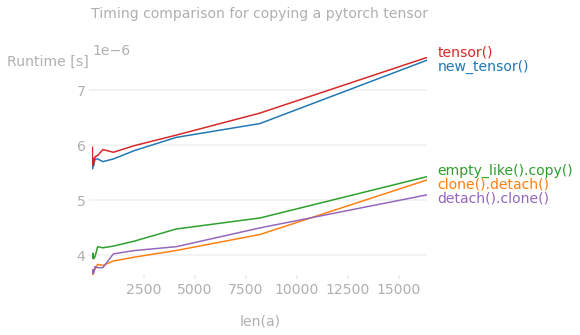

In [7]:
import perfplot

perfplot.show(
    setup=lambda n: torch.randn(n),
    kernels=[
        lambda a: a.new_tensor(a),
        lambda a: a.clone().detach(),
        lambda a: torch.empty_like(a).copy_(a),
        lambda a: torch.tensor(a),
        lambda a: a.detach().clone(),
    ],
    labels=["new_tensor()", "clone().detach()", "empty_like().copy()", "tensor()", "detach().clone()"],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(a)",
    logx=False,
    logy=False,
    title='Timing comparison for copying a pytorch tensor',
)